In [22]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz 
!tar xzf CIFAR10.tar.gz 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 196MB/s]


In [69]:
from tensorflow import keras
import tensorflow as tf
from keras import datasets, layers, losses, utils
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime

In [45]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
train_images = train_images[:20000]
test_images = test_images[:4000]

In [46]:
category_indices_test = []
category_indices_train = []

category_indices_test += [0 for _ in range(1000)]
category_indices_test += [1 for _ in range(1000, 2000)]
category_indices_test += [2 for _ in range(2000, 3000)]
category_indices_test += [3 for _ in range(3000, 4000)]

unique_category_count = 4
inputs = tf.one_hot(category_indices_test, unique_category_count, dtype=np.uint8)
test_labels = np.array(inputs)

category_indices_train += [0 for _ in range(5000)]
category_indices_train += [1 for _ in range(5000, 10000)]
category_indices_train += [2 for _ in range(10000, 15000)]
category_indices_train += [3 for _ in range(15000, 20000)]

unique_category_count = 4
inputs = tf.one_hot(category_indices_train, unique_category_count, dtype=np.uint8)
train_labels = np.array(inputs)

In [47]:
print(type(test_images))
print(test_images.shape)
print(type(train_images))
print(train_images.shape)
print(type(test_labels))
print(test_labels.shape)
print(type(train_labels))
print(train_labels.shape)

<class 'numpy.ndarray'>
(4000, 32, 32, 3)
<class 'numpy.ndarray'>
(20000, 32, 32, 3)
<class 'numpy.ndarray'>
(4000, 4)
<class 'numpy.ndarray'>
(20000, 4)


In [48]:
def rgb2gray(rgb): 
 
    r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b 
 
    return gray

In [49]:
train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

In [50]:
class_names = ['airplane', 'automobile', 'bird', 'cat']

Text(0.5, 1.0, 'automobile')

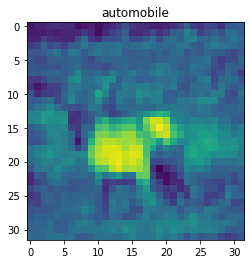

In [51]:
index = 3
plt.imshow(train_images[index])
plt.title(class_names[train_labels[index][0]])

In [52]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [53]:
train_images = train_images.reshape(-1, 1024)
test_images = test_images.reshape(-1, 1024)

In [54]:
idx = np.random.permutation(len(train_images))
train_images, train_labels = train_images[idx], train_labels[idx]

idx = np.random.permutation(len(test_images))
test_images, test_labels = test_images[idx], test_labels[idx]

In [55]:
print(train_labels.shape)
print(train_images.shape)
print(test_labels.shape)
print(test_images.shape)

(20000, 4)
(20000, 1024)
(4000, 4)
(4000, 1024)


In [90]:
W1 = np.random.normal(size=(16, 1024))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))

b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

In [91]:
def sigmoid(x):
    return 1 / (1 + pow(np.e, -x))

In [92]:
number_of_correct_estimations = 0
total_images = 200

for i in range (total_images):
  a0 = train_images[i].reshape(-1,1)
  a1 = sigmoid(W1 @ a0 + b1)
  a2 = sigmoid(W2 @ a1 + b2)
  a3 = sigmoid(W3 @ a2 + b3)

  output = np.argmax(a3)
  label = np.argmax(train_labels[i], axis=0)

  if(output == label): 
    number_of_correct_estimations += 1

print(f"Accuracy: {number_of_correct_estimations / total_images}")

Accuracy: 0.27


In [96]:
time = datetime.now()
total_images = 200
epochs_num = 10
batch_size = 16
learning_rate = 0.3
train_set = []
test_set = []
total_costs = []

for i in range(train_labels.T.shape[1]):
  train_set.append((train_images.T[:, i].reshape(1024, 1), train_labels.T[:, i].reshape(4, 1)))
for i in range(test_labels.T.shape[1]):
  test_set.append((test_images[i, :].T.reshape(1024, 1), test_labels[i, :].T.reshape(4, 1)))

for epoch in range(epochs_num):
    batches = [train_set[x:x+batch_size] for x in range(0, total_images, batch_size)]
    for batch in batches:
        # allocate weight and bias gradient matrix for each layer
        grad_W1 = np.zeros((16, 1024))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((4, 16))
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        for image, label in batch:
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)
            
            # ---- Last layer
            # computing weight and bias
            for j in range(grad_W3.shape[0]):
                for k in range(grad_W3.shape[1]):
                    grad_W3[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]
            
            for j in range(grad_b3.shape[0]):
                    grad_b3[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            
            # ---- 3rd layer
            #  computing activation
            delta_3 = np.zeros((16, 1))
            for k in range(16):
                for j in range(4):
                    delta_3[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * W3[j, k]
            
            # computing weight and bias
            for k in range(grad_W2.shape[0]):
                for m in range(grad_W2.shape[1]):
                    grad_W2[k, m] += delta_3[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
            for k in range(grad_b2.shape[0]):
                    grad_b2[k, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    
            # ---- 2nd layer
            # computing activation
            delta_2 = np.zeros((16, 1))
            for m in range(16):
                for k in range(16):
                    delta_2[m, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * W2[k, m]
            
            # computing weight and bias
            for m in range(grad_W1.shape[0]):
                for v in range(grad_W1.shape[1]):
                    grad_W1[m, v] += delta_2[m, 0] * a1[m,0] * (1 - a1[m, 0]) * image[v, 0]
            for m in range(grad_b1.shape[0]):
                    grad_b1[m, 0] += delta_2[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
     # calculate cost average per epoch
    cost = 0
    for train_data in train_set[:total_images]:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= total_images
    total_costs.append(cost) 

Accuracy: 0.42


TypeError: ignored

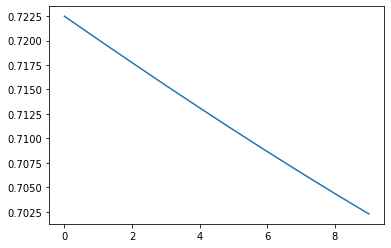

In [104]:
epoch_size = [x for x in range(epochs_num)]
plt.plot(epoch_size, total_costs)
number_of_correct_estimations = 0
for train_data in train_set[:total_images]:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(train_data[1] == np.amax(train_data[1]))
    
    if predicted_number == real_number:
        number_of_correct_estimations += 1
        
print(f"Accuracy: {number_of_correct_estimations / total_images}")
end_time = datetime.now()
print('backpropagation time: {}'.format(end_time - time))

In [113]:
time = datetime.now()
total_images = 200
epochs_num = 20
batch_size = 16
learning_rate = 0.3
train_set = []
test_set = []
total_costs = []

for i in range(train_labels.T.shape[1]):
  train_set.append((train_images.T[:, i].reshape(1024, 1), train_labels.T[:, i].reshape(4, 1)))
for i in range(test_labels.T.shape[1]):
  test_set.append((test_images[i, :].T.reshape(1024, 1), test_labels[i, :].T.reshape(4, 1)))

#10 iretaion
for i in range(10):
  batches = [train_set[x:x+batch_size] for x in range(0, total_images, batch_size)]
  for epoch in range(epochs_num):
      for batch in batches:
          # allocate weight and bias gradient matrix for each layer
          grad_W1 = np.zeros((16, 1024))
          grad_W2 = np.zeros((16, 16))
          grad_W3 = np.zeros((4, 16))
          grad_b1 = np.zeros((16, 1))
          grad_b2 = np.zeros((16, 1))
          grad_b3 = np.zeros((4, 1))
          
          for image, label in batch:
              a1 = sigmoid(W1 @ image + b1)
              a2 = sigmoid(W2 @ a1 + b2)
              a3 = sigmoid(W3 @ a2 + b3)
              
              # ---- Last layer
              # weight
              grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
              
              # bias
              grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)
              
              # ---- 3rd layer
              # activation
              delta_3 = np.zeros((16, 1))
              delta_3 += np.transpose(W3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
              
              # weight
              grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)
              
              # bias
              grad_b2 += delta_3 * a2 * (1 - a2)
                      
              # ---- 2nd layer
              # activation
              delta_2 = np.zeros((16, 1))
              delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)
              
              # weight
              grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)
                      
              # bias
              grad_b1 += delta_2 * a1 * (1 - a1)
          
          W3 = W3 - (learning_rate * (grad_W3 / batch_size))
          W2 = W2 - (learning_rate * (grad_W2 / batch_size))
          W1 = W1 - (learning_rate * (grad_W1 / batch_size))
          
          b3 = b3 - (learning_rate * (grad_b3 / batch_size))
          b2 = b2 - (learning_rate * (grad_b2 / batch_size))
          b1 = b1 - (learning_rate * (grad_b1 / batch_size))
      
      # calculate cost average per epoch
      cost = 0
      for train_data in train_set[:total_images]:
          a0 = train_data[0]
          a1 = sigmoid(W1 @ a0 + b1)
          a2 = sigmoid(W2 @ a1 + b2)
          a3 = sigmoid(W3 @ a2 + b3)

          for j in range(4):
              cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
              
      cost /= total_images
      total_costs.append(cost)

Accuracy: 0.73
backpropagation time: 0:00:31.049182


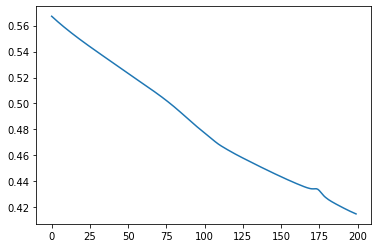

In [114]:
epoch_size = [x for x in range(10*epochs_num)]
plt.plot(epoch_size, total_costs)
number_of_correct_estimations = 0
for train_data in train_set[:total_images]:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(train_data[1] == np.amax(train_data[1]))
    
    if predicted_number == real_number:
        number_of_correct_estimations += 1
        
print(f"Accuracy: {number_of_correct_estimations / total_images}")
end_time = datetime.now()
print('backpropagation time: {}'.format(end_time - time))

In [121]:
total_images = 8000
epochs_num = 40
batch_size = 16
learning_rate = 0.3
train_set = []
test_set = []
total_costs = []

for i in range(train_labels.T.shape[1]):
  train_set.append((train_images.T[:, i].reshape(1024, 1), train_labels.T[:, i].reshape(4, 1)))
for i in range(test_labels.T.shape[1]):
  test_set.append((test_images[i, :].T.reshape(1024, 1), test_labels[i, :].T.reshape(4, 1)))

for i in range(10):
  for epoch in range(epochs_num):
      batches = [train_set[x:x+batch_size] for x in range(0, total_images, batch_size)]
      for batch in batches:
          # allocate weight and bias gradient matrix for each layer
          grad_W1 = np.zeros((16, 1024))
          grad_W2 = np.zeros((16, 16))
          grad_W3 = np.zeros((4, 16))
          grad_b1 = np.zeros((16, 1))
          grad_b2 = np.zeros((16, 1))
          grad_b3 = np.zeros((4, 1))
          
          for image, label in batch:
              a1 = sigmoid(W1 @ image + b1)
              a2 = sigmoid(W2 @ a1 + b2)
              a3 = sigmoid(W3 @ a2 + b3)
              
              # ---- Last layer
              # weight
              grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
              
              # bias
              grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)
              
              # ---- 3rd layer
              # activation
              delta_3 = np.zeros((16, 1))
              delta_3 += np.transpose(W3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
              
              # weight
              grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)
              
              # bias
              grad_b2 += delta_3 * a2 * (1 - a2)
                      
              # ---- 2nd layer
              # activation
              delta_2 = np.zeros((16, 1))
              delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)
              
              # weight
              grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)
                      
              # bias
              grad_b1 += delta_2 * a1 * (1 - a1)
          
          W3 = W3 - (learning_rate * (grad_W3 / batch_size))
          W2 = W2 - (learning_rate * (grad_W2 / batch_size))
          W1 = W1 - (learning_rate * (grad_W1 / batch_size))
          
          b3 = b3 - (learning_rate * (grad_b3 / batch_size))
          b2 = b2 - (learning_rate * (grad_b2 / batch_size))
          b1 = b1 - (learning_rate * (grad_b1 / batch_size))
      
      # calculate cost average per epoch
      cost = 0
      for train_data in train_set:
          a0 = train_data[0]
          a1 = sigmoid(W1 @ a0 + b1)
          a2 = sigmoid(W2 @ a1 + b2)
          a3 = sigmoid(W3 @ a2 + b3)

          for j in range(4):
              cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
              
      cost /= total_images
      total_costs.append(cost)

KeyboardInterrupt: ignored

Accuracy: 0.123375


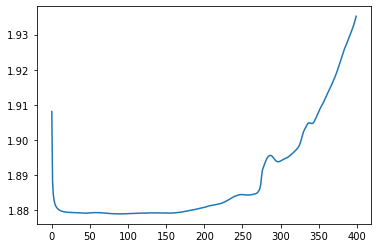

In [119]:
epoch_size = [x for x in range(10*epochs_num)]
plt.plot(epoch_size, total_costs)
number_of_correct_estimations = 0
for test_data in test_set:
    a0 = test_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted_number = np.where(a3 == np.amax(a3))
    real_number = np.where(test_data[1] == np.amax(test_data[1]))
    
    if predicted_number == real_number:
        number_of_correct_estimations += 1
        
print(f"Accuracy: {number_of_correct_estimations / total_images}")